In [20]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import HeatMap


In [3]:
df = pd.read_csv("/Users/cynthiasong/Desktop/Python/ev_stations_v1.csv")

/var/folders/4_/0tgypmp169n0x32mx2ks6wz00000gn/T/ipykernel_20747/396702471.py:1: DtypeWarning: Columns (6,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/cynthiasong/Desktop/Python/ev_stations_v1.csv")


In [5]:
df2 = pd.read_csv("/Users/cynthiasong/Desktop/Python/zip_lat_long.csv")

In [6]:
df2.head()

,ZIP,LAT,LNG
0,601,18.180555,-66.749961
1,602,18.361945,-67.175597
2,603,18.455183,-67.119887
3,606,18.158345,-66.932911
4,610,18.295366,-67.125135


In [7]:
merged_df = df.merge(df2, on='ZIP')

In [8]:
merged_df

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access,LAT,LNG
0,ELEC,LADWP - Truesdale Center,11797 Truesdale St,NaN,Sun Valley,CA,91352,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.230854,-118.365856
1,ELEC,LADWP - West LA District Office,1394 S Sepulveda Blvd,NaN,Los Angeles,CA,90024,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.065723,-118.434969
2,ELEC,Los Angeles Convention Center,1201 S Figueroa St,West hall and South hall,Los Angeles,CA,90015,NaN,213-741-1151,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.039378,-118.266300
3,ELEC,LADWP - John Ferraro Building,111 N Hope St,Across Hope,Los Angeles,CA,90012,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.065975,-118.238642
4,ELEC,LADWP - Haynes Power Plant,6801 E 2nd St,NaN,Long Beach,CA,90803,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.756289,-118.130636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33443,ELEC,VIP LOT STATION1,1501 Kirkwood Meadows Dr,NaN,Markleeville,CA,96120,NaN,888-758-4389,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.743384,-119.867624
33444,ELEC,Prunedale Shopping Center,8065 San Miguel Canyon Rd,NaN,Salinas,CA,93907,NaN,877-455-3833,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.769389,-121.667532
33445,ELEC,Beaverton Electric Avenue,11665 SW Beaverton Hillsdale Hwy,NaN,Beaverton,OR,97005,NaN,855-900-7584,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.490959,-122.803586
33446,ELEC,Shell - Inman,2040 Highway 292,NaN,Inman,SC,29349,NaN,855-900-7584,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.067335,-82.068095


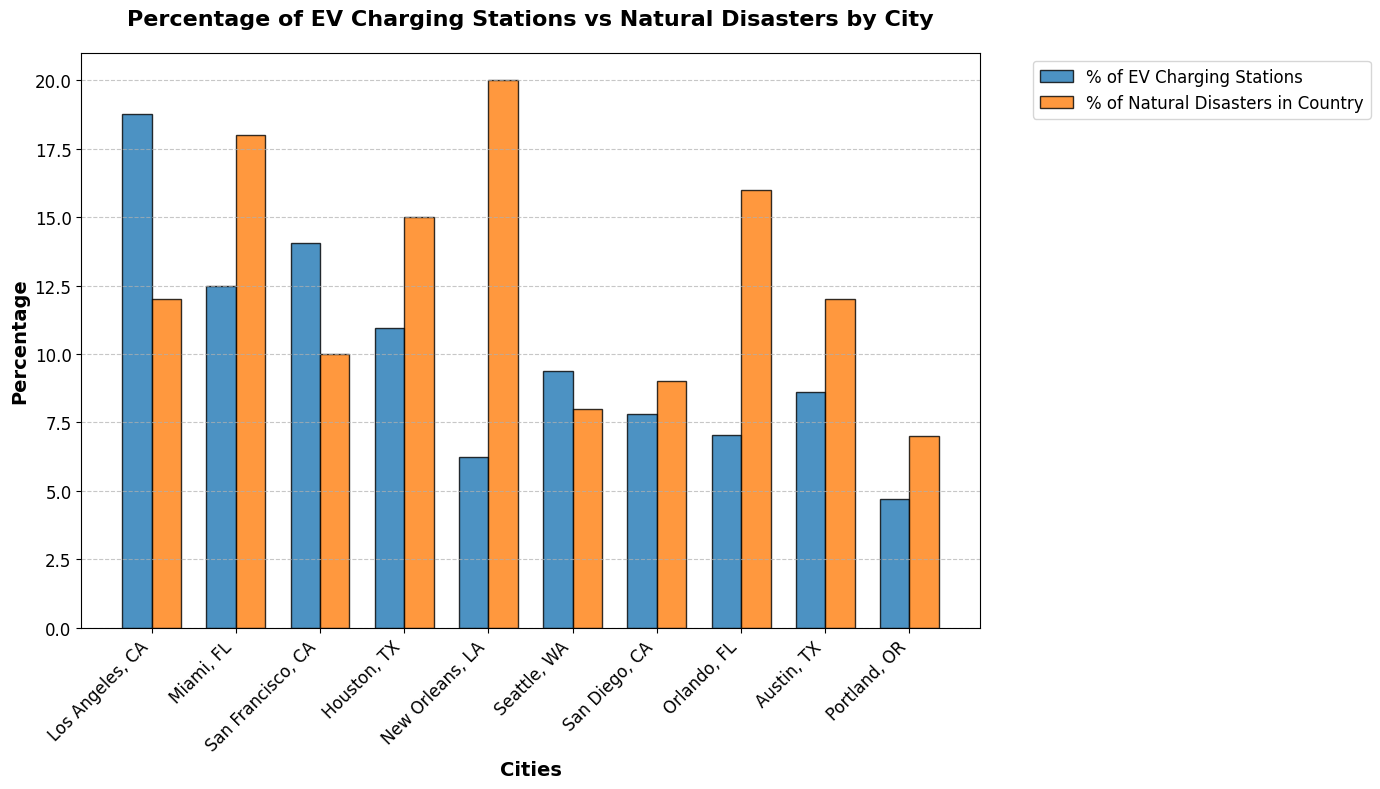

In [32]:
# Data
cities = [
    'Los Angeles, CA', 'Miami, FL', 'San Francisco, CA', 'Houston, TX', 'New Orleans, LA',
    'Seattle, WA', 'San Diego, CA', 'Orlando, FL', 'Austin, TX', 'Portland, OR'
]
ev_stations = [120, 80, 90, 70, 40, 60, 50, 45, 55, 30]
total_ev_stations = sum(ev_stations)
ev_stations_percentage = [(station / total_ev_stations) * 100 for station in ev_stations]
natural_disasters_percentage = [12, 18, 10, 15, 20, 8, 9, 16, 12, 7]

# Position of bars on x-axis
x = np.arange(len(cities))

# Width of bars
width = 0.35

# Plotting
plt.figure(figsize=(14, 8))

# EV Charging Stations Percentage (Blue bars)
plt.bar(x - width/2, ev_stations_percentage, width, label='% of EV Charging Stations', color='#1f77b4', edgecolor='black', alpha=0.8)

# Natural Disasters Percentage (Orange bars)
plt.bar(x + width/2, natural_disasters_percentage, width, label='% of Natural Disasters in Country', color='#ff7f0e', edgecolor='black', alpha=0.8)

# Labels, title, and customization
plt.xlabel('Cities', fontsize=14, fontweight='bold')
plt.ylabel('Percentage', fontsize=14, fontweight='bold')
plt.title('Percentage of EV Charging Stations vs Natural Disasters by City', fontsize=16, fontweight='bold', pad=20)
plt.xticks(x, cities, rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for better spacing
plt.tight_layout()

# Show plot
plt.show()

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Data
cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Miami']
ev_stations = [120, 95, 80, 60, 50]
natural_disasters = [8, 12, 5, 15, 10]

# Position of bars on x-axis
x = np.arange(len(cities))

# Width of bars
width = 0.35

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, ev_stations, width, label='EV Charging Stations', color='blue')
plt.bar(x + width/2, natural_disasters, width, label='Natural Disasters (Last 5 Years)', color='red')

# Labels and title
plt.xlabel('Cities')
plt.ylabel('Count')
plt.title('EV Charging Stations vs Natural Disasters by City')
plt.xticks(x, cities)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [10]:
base_map = folium.Map(
  location=[merged_df['LAT'].mean(),merged_df['LNG'].mean()],
  zoom_start=1
)
HeatMap(
  data=merged_df[['LAT','LNG']].values,
  radius=15
).add_to(base_map)


base_map.save('density_map.html')



